# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

Perform API Calls
# Perform a weather check on each city using a series of successive API calls.

* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

# specify units for my search (we want temperatures in Fahrenheit)
units = "imperial"



# specify base url for the search
url = "http://api.openweathermap.org/data/2.5/weather?"

# build partial query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url+"London").json()
pprint(weather_response)


{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1589600942,
 'id': 2643743,
 'main': {'feels_like': 41.67,
          'humidity': 61,
          'pressure': 1025,
          'temp': 48.02,
          'temp_max': 50,
          'temp_min': 45},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 1414,
         'sunrise': 1589602004,
         'sunset': 1589658436,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 290, 'speed': 5.82}}


In [6]:
# Loop through the list of cities and perform a request for the following data on each: temperature (F), latitude, longitude,
# humidity (%), cloudiness (%), wind speed (mph):

dictionary = {}

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        pprint(response)
        temp = response['main']['temp']
        max_temp = response['main']['temp_max']
        latitude = response['coord']['lat']
        longitude = response['coord']['lon']
        humidity = response['main']['humidity']
        cloudiness = response['clouds']['all']
        windspeed = response['wind']['speed']
         
        dictionary.update({city: {"Temperature": temp, "Max Temp": max_temp, "Latitude": latitude, "Longitude": longitude, "Humidity": humidity, "Cloudiness": cloudiness, "Windspeed": windspeed}})
              
    except KeyError:
        print("KeyError")
              

{'base': 'stations',
 'clouds': {'all': 28},
 'cod': 200,
 'coord': {'lat': -3.8, 'lon': 102.27},
 'dt': 1589601107,
 'id': 1649150,
 'main': {'feels_like': 93.63,
          'grnd_level': 1005,
          'humidity': 59,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 87.91,
          'temp_max': 87.91,
          'temp_min': 87.91},
 'name': 'Bengkulu',
 'sys': {'country': 'ID', 'sunrise': 1589584149, 'sunset': 1589627138},
 'timezone': 25200,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 206, 'speed': 5.01}}
{'cod': '404', 'message': 'city not found'}
KeyError
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 62.46, 'lon': -114.35},
 'dt': 1589601289,
 'id': 6185377,
 'main': {'feels_like': 20.43,
          'humidity': 86,
          'pressure': 1010,
          'temp': 31.73,
          'temp_max': 32,
          'temp_min': 30.99

{'base': 'stations',
 'clouds': {'all': 96},
 'cod': 200,
 'coord': {'lat': 71.69, 'lon': 128.87},
 'dt': 1589601360,
 'id': 2015306,
 'main': {'feels_like': 21.69,
          'grnd_level': 1027,
          'humidity': 97,
          'pressure': 1031,
          'sea_level': 1031,
          'temp': 32.38,
          'temp_max': 32.38,
          'temp_min': 32.38},
 'name': 'Tiksi',
 'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0},
 'timezone': 32400,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 94, 'speed': 12.53}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 69.22, 'lon': -51.1},
 'dt': 1589601360,
 'id': 3423146,
 'main': {'feels_like': 25.11,
          'humidity': 100,
          'pressure': 1022,
          'temp': 30.2,
          'temp_max': 30.2,
          'temp_min': 30.2},
 'name': 'Ilulissat',
 'sys': {'country': 'GL',
         'id': 165,
     

{'base': 'stations',
 'clouds': {'all': 51},
 'cod': 200,
 'coord': {'lat': -42.88, 'lon': 147.33},
 'dt': 1589601362,
 'id': 2163355,
 'main': {'feels_like': 51.55,
          'humidity': 42,
          'pressure': 1023,
          'temp': 60.67,
          'temp_max': 62.6,
          'temp_min': 59},
 'name': 'Hobart',
 'sys': {'country': 'AU',
         'id': 9545,
         'sunrise': 1589577431,
         'sunset': 1589612226,
         'type': 1},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 320, 'speed': 11.41}}
{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 5.89, 'lon': 95.32},
 'dt': 1589601362,
 'id': 1214026,
 'main': {'feels_like': 89.69,
          'grnd_level': 1005,
          'humidity': 80,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 83.55,
          'temp_max': 83.55,
     

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 78.22, 'lon': 15.64},
 'dt': 1589601364,
 'id': 2729907,
 'main': {'feels_like': 22.3,
          'humidity': 74,
          'pressure': 1020,
          'temp': 33.8,
          'temp_max': 33.8,
          'temp_min': 33.8},
 'name': 'Longyearbyen',
 'sys': {'country': 'SJ', 'id': 1663, 'sunrise': 0, 'sunset': 0, 'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 80, 'speed': 12.75}}
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 41.53, 'lon': -87.42},
 'dt': 1589601364,
 'id': 4920986,
 'main': {'feels_like': 59.41,
          'humidity': 77,
          'pressure': 1016,
          'temp': 61.7,
          'temp_max': 64.4,
          'temp_min': 59},
 'name': 'Griffith',
 'sys': {'country': 'US',
         'id': 4505,
         'sunrise':

{'cod': '404', 'message': 'city not found'}
KeyError
{'base': 'stations',
 'clouds': {'all': 17},
 'cod': 200,
 'coord': {'lat': 53.9, 'lon': 11.47},
 'dt': 1589601366,
 'id': 2807465,
 'main': {'feels_like': 35.11,
          'humidity': 93,
          'pressure': 1015,
          'temp': 41.85,
          'temp_max': 43,
          'temp_min': 39.99},
 'name': 'Wismar',
 'sys': {'country': 'DE',
         'id': 2018637,
         'sunrise': 1589598579,
         'sunset': 1589656293,
         'type': 3},
 'timezone': 7200,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 248, 'gust': 15.01, 'speed': 8.01}}
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': -19.98, 'lon': 57.61},
 'dt': 1589601366,
 'id': 934649,
 'main': {'feels_like': 79.63,
          'humidity': 77,
          'pressure': 1016,
          'temp': 75,
          'temp_max': 75,
          'temp_min': 75},
 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 18.39, 'lon': 42.45},
 'dt': 1589601369,
 'id': 110690,
 'main': {'feels_like': 61.59,
          'humidity': 67,
          'pressure': 1024,
          'temp': 63.5,
          'temp_max': 64.4,
          'temp_min': 62.6},
 'name': 'Faya',
 'sys': {'country': 'SA',
         'id': 7396,
         'sunrise': 1589596583,
         'sunset': 1589643418,
         'type': 1},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 30, 'speed': 4.7}}
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 17.02, 'lon': 54.09},
 'dt': 1589601369,
 'id': 286621,
 'main': {'feels_like': 95.43,
          'humidity': 83,
          'pressure': 1008,
          'temp': 84.2,
          'temp_max': 84.2,
          'temp_min': 84.2},
 'name': 'Salalah',
 'sys': {'country': '

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -30.18, 'lon': -50.21},
 'dt': 1589601371,
 'id': 3466165,
 'main': {'feels_like': 47.95,
          'grnd_level': 1017,
          'humidity': 73,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 54.55,
          'temp_max': 54.55,
          'temp_min': 54.55},
 'name': 'Cidreira',
 'sys': {'country': 'BR', 'sunrise': 1589623201, 'sunset': 1589661278},
 'timezone': -10800,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 300, 'speed': 10.11}}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 43.32, 'lon': 145.57},
 'dt': 1589601371,
 'id': 2128975,
 'main': {'feels_like': 42.82,
          'humidity': 66,
          'pressure': 1012,
          'temp': 53.6,
          'temp_max': 53.6,
          'temp_min': 53.6},
 'name': 'Nemuro',
 'sys': {'country': 'JP',
  

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -20.41, 'lon': 57.7},
 'dt': 1589601373,
 'id': 934322,
 'main': {'feels_like': 67.21,
          'humidity': 93,
          'pressure': 1015,
          'temp': 66.2,
          'temp_max': 66.2,
          'temp_min': 66.2},
 'name': 'Mahébourg',
 'sys': {'country': 'MU',
         'id': 2061,
         'sunrise': 1589596297,
         'sunset': 1589636383,
         'type': 1},
 'timezone': 14400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 320, 'speed': 6.93}}
{'cod': '404', 'message': 'city not found'}
KeyError
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 10.44, 'lon': 45.01},
 'dt': 1589601374,
 'id': 64435,
 'main': {'feels_like': 96.82,
          'grnd_level': 1009,
          'humidity': 52,
          'pressure': 1009,
          'sea_level': 1009,
          '

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 63.44, 'lon': -20.27},
 'dt': 1589601376,
 'id': 3412093,
 'main': {'feels_like': 30.74,
          'grnd_level': 1017,
          'humidity': 71,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 41.09,
          'temp_max': 41.09,
          'temp_min': 41.09},
 'name': 'Vestmannaeyjar',
 'sys': {'country': 'IS', 'sunrise': 1589602167, 'sunset': 1589667941},
 'timezone': 0,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 95, 'speed': 12.15}}
{'cod': '404', 'message': 'city not found'}
KeyError
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 22.89, 'lon': -109.91},
 'dt': 1589601321,
 'id': 3985710,
 'main': {'feels_like': 71.29,
          'humidity': 71,
          'pressure': 1010,
          'temp': 73.99,
          'temp_max': 75,
          'temp_min': 73},
 'na

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 48.41, 'lon': -114.34},
 'dt': 1589601378,
 'id': 5686121,
 'main': {'feels_like': 41.63,
          'humidity': 76,
          'pressure': 1020,
          'temp': 48.2,
          'temp_max': 48.2,
          'temp_min': 48.2},
 'name': 'Whitefish',
 'sys': {'country': 'US',
         'id': 4253,
         'sunrise': 1589543787,
         'sunset': 1589598671,
         'type': 1},
 'timezone': -21600,
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 170, 'speed': 8.05}}
{'base': 'stations',
 'clouds': {'all': 71},
 'cod': 200,
 'coord': {'lat': 12.28, 'lon': -10.97},
 'dt': 1589601378,
 'id': 2458624,
 'main': {'feels_like': 89.69,
          'grnd_level': 985,
          'humidity': 57,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 84.81,
          'temp_max': 84.81

{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': -43.3, 'lon': -65.1},
 'dt': 1589601380,
 'id': 3839307,
 'main': {'feels_like': 56.82,
          'grnd_level': 998,
          'humidity': 53,
          'pressure': 999,
          'sea_level': 999,
          'temp': 66.47,
          'temp_max': 66.47,
          'temp_min': 66.47},
 'name': 'Rawson',
 'sys': {'country': 'AR', 'sunrise': 1589628518, 'sunset': 1589663108},
 'timezone': -10800,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 305, 'speed': 16.71}}
{'base': 'stations',
 'clouds': {'all': 38},
 'cod': 200,
 'coord': {'lat': -2.57, 'lon': 150.8},
 'dt': 1589601380,
 'id': 2094342,
 'main': {'feels_like': 89.11,
          'grnd_level': 1005,
          'humidity': 78,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 85.41,
          'temp_max': 85.41,
          'temp_min': 85

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 26.75, 'lon': 94.22},
 'dt': 1589601383,
 'id': 1268820,
 'main': {'feels_like': 79.56,
          'humidity': 100,
          'pressure': 1008,
          'temp': 73.4,
          'temp_max': 73.4,
          'temp_min': 73.4},
 'name': 'Jorhāt',
 'sys': {'country': 'IN',
         'id': 9123,
         'sunrise': 1589583316,
         'sunset': 1589631835,
         'type': 1},
 'timezone': 19800,
 'visibility': 3500,
 'weather': [{'description': 'mist', 'icon': '50d', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 110, 'speed': 5.82}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 64.38, 'lon': -173.3},
 'dt': 1589601383,
 'id': 4031574,
 'main': {'feels_like': 32.11,
          'grnd_level': 1009,
          'humidity': 62,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': 42.57,
          'temp_max': 42.57,
          'temp_min': 42.57},
 'name': 'Provideniya',
 'sys

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -18.65, 'lon': -173.98},
 'dt': 1589601385,
 'id': 4032420,
 'main': {'feels_like': 90.95,
          'humidity': 70,
          'pressure': 1011,
          'temp': 84.2,
          'temp_max': 84.2,
          'temp_min': 84.2},
 'name': 'Neiafu',
 'sys': {'country': 'TO',
         'id': 7292,
         'sunrise': 1589651751,
         'sunset': 1589692139,
         'type': 1},
 'timezone': 46800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 260, 'speed': 4.7}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 38.89, 'lon': 16.6},
 'dt': 1589601385,
 'id': 2525059,
 'main': {'feels_like': 56.19,
          'humidity': 72,
          'pressure': 1014,
          'temp': 60.8,
          'temp_max': 60.8,
          'temp_min': 60.8},
 'name': 'Catanzaro',
 'sys': {'c

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 11.4, 'lon': 79.23},
 'dt': 1589601387,
 'id': 1259917,
 'main': {'feels_like': 97.02,
          'grnd_level': 1000,
          'humidity': 46,
          'pressure': 1006,
          'sea_level': 1006,
          'temp': 93.36,
          'temp_max': 93.36,
          'temp_min': 93.36},
 'name': 'Pennādam',
 'sys': {'country': 'IN', 'sunrise': 1589588393, 'sunset': 1589633953},
 'timezone': 19800,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 300, 'speed': 6.55}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 29.16, 'lon': 16.14},
 'dt': 1589601387,
 'id': 2209055,
 'main': {'feels_like': 68.22,
          'grnd_level': 985,
          'humidity': 17,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 78.13,
          'temp_max': 78.13,
          'temp_min': 7

{'cod': '404', 'message': 'city not found'}
KeyError
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 64.56, 'lon': 39.83},
 'dt': 1589601389,
 'id': 496285,
 'main': {'feels_like': 35.22,
          'humidity': 93,
          'pressure': 1003,
          'temp': 39.2,
          'temp_max': 39.2,
          'temp_min': 39.2},
 'name': 'Severodvinsk',
 'sys': {'country': 'RU',
         'id': 8922,
         'sunrise': 1589587009,
         'sunset': 1589654250,
         'type': 1},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'speed': 2.24}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -19.31, 'lon': -48.92},
 'dt': 1589601389,
 'id': 3452440,
 'main': {'feels_like': 66.72,
          'grnd_level': 945,
          'humidity': 96,
          'pressure': 1017,
          'sea_level': 1017,
          't

{'base': 'stations',
 'clouds': {'all': 9},
 'cod': 200,
 'coord': {'lat': -31.67, 'lon': 18.5},
 'dt': 1589601391,
 'id': 3359736,
 'main': {'feels_like': 49.89,
          'grnd_level': 1018,
          'humidity': 90,
          'pressure': 1023,
          'sea_level': 1023,
          'temp': 51.35,
          'temp_max': 51.35,
          'temp_min': 51.35},
 'name': 'Vredendal',
 'sys': {'country': 'ZA', 'sunrise': 1589606872, 'sunset': 1589644626},
 'timezone': 7200,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 55, 'speed': 2.04}}
{'cod': '404', 'message': 'city not found'}
KeyError
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 32.35, 'lon': -85.2},
 'dt': 1589601392,
 'id': 4047434,
 'main': {'feels_like': 67.21,
          'humidity': 93,
          'pressure': 1017,
          'temp': 65.01,
          'temp_max': 71.6,
          'temp_min': 62.01},
 'name':

{'base': 'stations',
 'clouds': {'all': 89},
 'cod': 200,
 'coord': {'lat': -2.68, 'lon': 111.62},
 'dt': 1589601393,
 'id': 1632694,
 'main': {'feels_like': 95.27,
          'grnd_level': 1006,
          'humidity': 86,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 84.4,
          'temp_max': 84.4,
          'temp_min': 84.4},
 'name': 'Pangkalanbuun',
 'rain': {'1h': 1.52},
 'sys': {'country': 'ID', 'sunrise': 1589581811, 'sunset': 1589624987},
 'timezone': 25200,
 'weather': [{'description': 'moderate rain',
              'icon': '10d',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 96, 'speed': 4.34}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -25.4, 'lon': -70.48},
 'dt': 1589601394,
 'id': 3870243,
 'main': {'feels_like': 61.68,
          'grnd_level': 1012,
          'humidity': 57,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 63.7,
          'temp_max': 63.7,
  

{'base': 'stations',
 'clouds': {'all': 7},
 'cod': 200,
 'coord': {'lat': 5.35, 'lon': 48.53},
 'dt': 1589601395,
 'id': 57000,
 'main': {'feels_like': 80.37,
          'grnd_level': 1011,
          'humidity': 72,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 83.41,
          'temp_max': 83.41,
          'temp_min': 83.41},
 'name': 'Hobyo',
 'sys': {'country': 'SO', 'sunrise': 1589596281, 'sunset': 1589640801},
 'timezone': 10800,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 221, 'speed': 22.17}}
{'cod': '404', 'message': 'city not found'}
KeyError
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -3.74, 'lon': -38.65},
 'dt': 1589601396,
 'id': 3402429,
 'main': {'feels_like': 85.35,
          'humidity': 94,
          'pressure': 1013,
          'temp': 76.48,
          'temp_max': 77,
          'temp_min': 75.99},
 'name': 'Ca

{'base': 'stations',
 'clouds': {'all': 10},
 'cod': 200,
 'coord': {'lat': 66.32, 'lon': -179.17},
 'dt': 1589601398,
 'id': 4031742,
 'main': {'feels_like': 16,
          'grnd_level': 983,
          'humidity': 96,
          'pressure': 1027,
          'sea_level': 1027,
          'temp': 27.48,
          'temp_max': 27.48,
          'temp_min': 27.48},
 'name': 'Egvekinot',
 'sys': {'country': 'RU', 'sunrise': 1589637937, 'sunset': 1589708444},
 'timezone': 43200,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 15, 'speed': 12.75}}
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 36.29, 'lon': -76.25},
 'dt': 1589601398,
 'id': 4465088,
 'main': {'feels_like': 63.99,
          'humidity': 77,
          'pressure': 1019,
          'temp': 67.78,
          'temp_max': 69.8,
          'temp_min': 66.99},
 'name': 'Elizabeth City',
 'sys': {'country': 'US',
      

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 47.67, 'lon': -52.73},
 'dt': 1589601400,
 'id': 6167817,
 'main': {'feels_like': 26.73,
          'humidity': 97,
          'pressure': 1011,
          'temp': 34.56,
          'temp_max': 36,
          'temp_min': 33.01},
 'name': 'Torbay',
 'sys': {'country': 'CA',
         'id': 998,
         'sunrise': 1589615496,
         'sunset': 1589670193,
         'type': 1},
 'timezone': -9000,
 'visibility': 24140,
 'weather': [{'description': 'light intensity shower rain',
              'icon': '09n',
              'id': 520,
              'main': 'Rain'}],
 'wind': {'deg': 290, 'speed': 8.05}}
{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 45.46, 'lon': 8.01},
 'dt': 1589601400,
 'id': 6457397,
 'main': {'feels_like': 58.03,
          'humidity': 98,
          'pressure': 969,
          'temp': 57.02,
          'temp_max': 57.99,
          'temp_min': 55.99},
 'name': 'Bose',
 'rain':

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 66, 'lon': 111.5},
 'dt': 1589601403,
 'id': 2027296,
 'main': {'feels_like': 37.47,
          'humidity': 52,
          'pressure': 1019,
          'temp': 46.4,
          'temp_max': 46.4,
          'temp_min': 46.4},
 'name': 'Aykhal',
 'sys': {'country': 'RU',
         'id': 8846,
         'sunrise': 1589568679,
         'sunset': 1589638177,
         'type': 1},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 50, 'speed': 8.95}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -21.64, 'lon': -41.05},
 'dt': 1589601403,
 'id': 3448903,
 'main': {'feels_like': 72.91,
          'grnd_level': 1018,
          'humidity': 80,
          'pressure': 1019,
          'sea_level': 1019,
          'temp': 71.22,
          'temp_max': 71.22,
     

         'type': 1},
 'timezone': 18000,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 160, 'speed': 6.93}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 66.66, 'lon': 66.42},
 'dt': 1589601405,
 'id': 1500933,
 'main': {'feels_like': 25.45,
          'grnd_level': 1000,
          'humidity': 98,
          'pressure': 1002,
          'sea_level': 1002,
          'temp': 35.01,
          'temp_max': 35.01,
          'temp_min': 35.01},
 'name': 'Labytnangi',
 'rain': {'1h': 0.44},
 'sys': {'country': 'RU', 'sunrise': 1589578828, 'sunset': 1589649667},
 'timezone': 18000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 16, 'speed': 11.32}}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 55.95, 'lon': -3.2},
 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -34.73, 'lon': 135.87},
 'dt': 1589601407,
 'id': 2063036,
 'main': {'feels_like': 57.34,
          'grnd_level': 1023,
          'humidity': 43,
          'pressure': 1026,
          'sea_level': 1026,
          'temp': 62.67,
          'temp_max': 62.67,
          'temp_min': 62.67},
 'name': 'Port Lincoln',
 'sys': {'country': 'AU', 'sunrise': 1589579053, 'sunset': 1589616106},
 'timezone': 34200,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 306, 'speed': 5.48}}
{'base': 'stations',
 'clouds': {'all': 50},
 'cod': 200,
 'coord': {'lat': -51.62, 'lon': -69.22},
 'dt': 1589601407,
 'id': 3838859,
 'main': {'feels_like': 22.03,
          'humidity': 93,
          'pressure': 983,
          'temp': 37.4,
          'temp_max': 37.4,
          'temp_min': 37.4},
 'name': 'Río Gallegos',
 'sys': {'country': 'AR',
   

{'base': 'stations',
 'clouds': {'all': 26},
 'cod': 200,
 'coord': {'lat': 63.9, 'lon': 122.76},
 'dt': 1589601409,
 'id': 2021017,
 'main': {'feels_like': 54.34,
          'grnd_level': 1009,
          'humidity': 67,
          'pressure': 1019,
          'sea_level': 1019,
          'temp': 59.04,
          'temp_max': 59.04,
          'temp_min': 59.04},
 'name': 'Kysyl-Syr',
 'sys': {'country': 'RU', 'sunrise': 1589567612, 'sunset': 1589633839},
 'timezone': 32400,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 103, 'speed': 7.61}}
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 45.02, 'lon': -93.22},
 'dt': 1589601409,
 'id': 5044290,
 'main': {'feels_like': 52.99,
          'humidity': 44,
          'pressure': 1017,
          'temp': 57.81,
          'temp_max': 60.8,
          'temp_min': 54},
 'name': 'Saint Anthony',
 'sys': {'country': 'US',


{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -45.42, 'lon': 167.72},
 'dt': 1589601412,
 'id': 2181625,
 'main': {'feels_like': 47.86,
          'grnd_level': 1002,
          'humidity': 63,
          'pressure': 1029,
          'sea_level': 1029,
          'temp': 50.63,
          'temp_max': 50.63,
          'temp_min': 50.63},
 'name': 'Te Anau',
 'sys': {'country': 'NZ', 'sunrise': 1589572953, 'sunset': 1589606917},
 'timezone': 43200,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 335, 'speed': 0.47}}
{'cod': '404', 'message': 'city not found'}
KeyError
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -28.45, 'lon': 21.26},
 'dt': 1589601412,
 'id': 945945,
 'main': {'feels_like': 35.28,
          'humidity': 65,
          'pressure': 1023,
          'temp': 41,
          'temp_max': 41,
          'temp_min': 41},
 'name': 'Upin

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 30.12, 'lon': 55.12},
 'dt': 1589601415,
 'id': 115781,
 'main': {'feels_like': 61.45,
          'grnd_level': 823,
          'humidity': 25,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 69.13,
          'temp_max': 69.13,
          'temp_min': 69.13},
 'name': 'Shahr-e Bābak',
 'sys': {'country': 'IR', 'sunrise': 1589592317, 'sunset': 1589641602},
 'timezone': 16200,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 115, 'speed': 7.25}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -5.56, 'lon': -80.82},
 'dt': 1589601415,
 'id': 3691954,
 'main': {'feels_like': 68.61,
          'grnd_level': 1011,
          'humidity': 76,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 71.64,
          'temp_max': 71.64,
          'temp_min': 71.

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -10.17, 'lon': 123.58},
 'dt': 1589601234,
 'id': 2057087,
 'main': {'feels_like': 86.92,
          'humidity': 55,
          'pressure': 1010,
          'temp': 89.6,
          'temp_max': 89.6,
          'temp_min': 89.6},
 'name': 'Kupang',
 'sys': {'country': 'ID',
         'id': 9364,
         'sunrise': 1589579570,
         'sunset': 1589621487,
         'type': 1},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 110, 'speed': 19.46}}
{'base': 'stations',
 'clouds': {'all': 95},
 'cod': 200,
 'coord': {'lat': -28.77, 'lon': 114.6},
 'dt': 1589601418,
 'id': 2070998,
 'main': {'feels_like': 71.76,
          'humidity': 47,
          'pressure': 1022,
          'temp': 75.2,
          'temp_max': 75.2,
          'temp_min': 75.2},
 'name': 'Geraldton',
 'sys': {'co

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 70.47, 'lon': -68.59},
 'dt': 1589601420,
 'id': 5924351,
 'main': {'feels_like': 8.47,
          'humidity': 100,
          'pressure': 1029,
          'temp': 17.6,
          'temp_max': 17.6,
          'temp_min': 17.6},
 'name': 'Clyde River',
 'sys': {'country': 'CA', 'id': 776, 'sunrise': 0, 'sunset': 0, 'type': 1},
 'timezone': -14400,
 'visibility': 402,
 'weather': [{'description': 'fog', 'icon': '50n', 'id': 741, 'main': 'Fog'}],
 'wind': {'deg': 140, 'speed': 6.93}}
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 37.46, 'lon': -122.43},
 'dt': 1589601420,
 'id': 5354943,
 'main': {'feels_like': 53.94,
          'humidity': 87,
          'pressure': 1018,
          'temp': 57.87,
          'temp_max': 61,
          'temp_min': 54},
 'name': 'Half Moon Bay',
 'sys': {'country': 'US',
         'id': 4322,
         'sunrise': 1589547611,
         'sunset': 1589598730,
         

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 33.66, 'lon': -112.34},
 'dt': 1589601422,
 'id': 5316205,
 'main': {'feels_like': 77.72,
          'humidity': 19,
          'pressure': 1007,
          'temp': 84.31,
          'temp_max': 87.8,
          'temp_min': 81},
 'name': 'Sun City West',
 'sys': {'country': 'US',
         'id': 4769,
         'sunrise': 1589545698,
         'sunset': 1589595800,
         'type': 1},
 'timezone': -25200,
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 250, 'speed': 6.93}}
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 43.27, 'lon': -7.54},
 'dt': 1589601422,
 'id': 3105522,
 'main': {'feels_like': 40.17,
          'humidity': 96,
          'pressure': 1020,
          'temp': 44.96,
          'temp_max': 46,
          'temp_min': 44.01},
 'name': 'Bereda',
 'sys': {'country

{'base': 'stations',
 'clouds': {'all': 25},
 'cod': 200,
 'coord': {'lat': -3.7, 'lon': 128.18},
 'dt': 1589601425,
 'id': 1651531,
 'main': {'feels_like': 89.8,
          'grnd_level': 1006,
          'humidity': 76,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 84.6,
          'temp_max': 84.6,
          'temp_min': 84.6},
 'name': 'Ambon City',
 'rain': {'1h': 0.12},
 'sys': {'country': 'ID', 'sunrise': 1589577922, 'sunset': 1589620928},
 'timezone': 32400,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 122, 'speed': 10.38}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 52.29, 'lon': 85.41},
 'dt': 1589601425,
 'id': 1491219,
 'main': {'feels_like': 63,
          'grnd_level': 991,
          'humidity': 53,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 70.27,
          'temp_max': 70.27,
         

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 43.33, 'lon': 1.25},
 'dt': 1589601427,
 'id': 2991152,
 'main': {'feels_like': 49.68,
          'humidity': 87,
          'pressure': 1018,
          'temp': 53.06,
          'temp_max': 55.4,
          'temp_min': 51.01},
 'name': 'Arrondissement de Muret',
 'sys': {'country': 'FR',
         'id': 6467,
         'sunrise': 1589603376,
         'sunset': 1589656401,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 260, 'speed': 5.82}}
{'cod': '404', 'message': 'city not found'}
KeyError
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 5.66, 'lon': -53.78},
 'dt': 1589601427,
 'id': 3381041,
 'main': {'feels_like': 80.35,
          'grnd_level': 1014,
          'humidity': 93,
          'pressure': 1014,
          'sea_l

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 23.19, 'lon': 116.61},
 'dt': 1589601429,
 'id': 1809062,
 'main': {'feels_like': 94.37,
          'humidity': 66,
          'pressure': 1009,
          'temp': 87.8,
          'temp_max': 87.8,
          'temp_min': 87.8},
 'name': 'Haimen',
 'sys': {'country': 'CN',
         'id': 9632,
         'sunrise': 1589578318,
         'sunset': 1589626085,
         'type': 1},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 140, 'speed': 6.71}}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -12.23, 'lon': 136.77},
 'dt': 1589601429,
 'id': 2064735,
 'main': {'feels_like': 83.26,
          'humidity': 70,
          'pressure': 1011,
          'temp': 84.2,
          'temp_max': 84.2,
          'temp_min': 84.2},
 'name': 'Nhulunbuy',
 'sys': {'

{'base': 'stations',
 'clouds': {'all': 4},
 'cod': 200,
 'coord': {'lat': -13.13, 'lon': 39},
 'dt': 1589601432,
 'id': 1037125,
 'main': {'feels_like': 58.69,
          'grnd_level': 956,
          'humidity': 94,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 60.24,
          'temp_max': 60.24,
          'temp_min': 60.24},
 'name': 'Montepuez',
 'sys': {'country': 'MZ', 'sunrise': 1589600128, 'sunset': 1589641529},
 'timezone': 7200,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 176, 'speed': 7.61}}
{'base': 'stations',
 'clouds': {'all': 38},
 'cod': 200,
 'coord': {'lat': -5.38, 'lon': 27},
 'dt': 1589601432,
 'id': 212360,
 'main': {'feels_like': 75.76,
          'grnd_level': 949,
          'humidity': 94,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 69.98,
          'temp_max': 69.98,
          'temp_min': 69.98},
 'name'

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 14.32, 'lon': 2.09},
 'dt': 1589601434,
 'id': 2440371,
 'main': {'feels_like': 86.52,
          'grnd_level': 980,
          'humidity': 34,
          'pressure': 1006,
          'sea_level': 1006,
          'temp': 90.03,
          'temp_max': 90.03,
          'temp_min': 90.03},
 'name': 'Ouallam',
 'sys': {'country': 'NE', 'sunrise': 1589606644, 'sunset': 1589652730},
 'timezone': 3600,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 222, 'speed': 10.67}}
{'base': 'stations',
 'clouds': {'all': 96},
 'cod': 200,
 'coord': {'lat': 39.05, 'lon': -27.98},
 'dt': 1589601434,
 'id': 3372964,
 'main': {'feels_like': 61.29,
          'grnd_level': 1017,
          'humidity': 91,
          'pressure': 1023,
          'sea_level': 1023,
          'temp': 63.5,
          'temp_max': 63.5,
          'temp_min': 63.5},
 'na

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -2.02, 'lon': 147.27},
 'dt': 1589601436,
 'id': 2092164,
 'main': {'feels_like': 87.73,
          'grnd_level': 1007,
          'humidity': 82,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 81.55,
          'temp_max': 81.55,
          'temp_min': 81.55},
 'name': 'Lorengau',
 'rain': {'1h': 2.22},
 'sys': {'country': 'PG', 'sunrise': 1589573200, 'sunset': 1589616486},
 'timezone': 36000,
 'weather': [{'description': 'moderate rain',
              'icon': '10d',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 121, 'speed': 7.96}}
{'cod': '404', 'message': 'city not found'}
KeyError
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 60.82, 'lon': -115.8},
 'dt': 1589601436,
 'id': 5972762,
 'main': {'feels_like': 38.01,
          'humidity': 42,
          'pressure': 1011,
          'temp': 44.6,
          'temp_max': 44.6,
       

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 57.82, 'lon': 114},
 'dt': 1589601438,
 'id': 2020311,
 'main': {'feels_like': 48.11,
          'grnd_level': 987,
          'humidity': 48,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 53.1,
          'temp_max': 53.1,
          'temp_min': 53.1},
 'name': 'Mamakan',
 'sys': {'country': 'RU', 'sunrise': 1589572717, 'sunset': 1589632939},
 'timezone': 28800,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 18, 'speed': 3.02}}
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 40.6, 'lon': -124.16},
 'dt': 1589601439,
 'id': 5563839,
 'main': {'feels_like': 52.93,
          'humidity': 87,
          'pressure': 1019,
          'temp': 55.13,
          'temp_max': 55.99,
          'temp_min': 53.6},
 'name': 'Fortuna',
 'sys': {'country': 'US',
         'id

{'base': 'stations',
 'clouds': {'all': 83},
 'cod': 200,
 'coord': {'lat': 43.25, 'lon': 13.51},
 'dt': 1589601441,
 'id': 3178014,
 'main': {'feels_like': 61.09,
          'humidity': 82,
          'pressure': 1017,
          'temp': 60.73,
          'temp_max': 62.01,
          'temp_min': 59},
 'name': 'Corridonia',
 'sys': {'country': 'IT',
         'id': 6775,
         'sunrise': 1589600450,
         'sunset': 1589653443,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 200, 'speed': 2.24}}
{'base': 'stations',
 'clouds': {'all': 54},
 'cod': 200,
 'coord': {'lat': 52.63, 'lon': 29.73},
 'dt': 1589601441,
 'id': 10722858,
 'main': {'feels_like': 38.46,
          'grnd_level': 999,
          'humidity': 79,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 43.75,
          'temp_max': 43.75,
   

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 52.3, 'lon': 85.08},
 'dt': 1589601443,
 'id': 1491633,
 'main': {'feels_like': 61.81,
          'grnd_level': 994,
          'humidity': 51,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 70.68,
          'temp_max': 70.68,
          'temp_min': 70.68},
 'name': 'Smolenskoye',
 'sys': {'country': 'RU', 'sunrise': 1589581371, 'sunset': 1589638167},
 'timezone': 25200,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 254, 'speed': 16.73}}
{'cod': '404', 'message': 'city not found'}
KeyError
{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': -34.04, 'lon': 23.05},
 'dt': 1589601443,
 'id': 988698,
 'main': {'feels_like': 47.68,
          'humidity': 93,
          'pressure': 1023,
          'temp': 50,
          'temp_max': 50,
          'temp_min': 50},
 'n

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 55.76, 'lon': 88.31},
 'dt': 1589601445,
 'id': 1489554,
 'main': {'feels_like': 62.13,
          'grnd_level': 985,
          'humidity': 53,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 68.99,
          'temp_max': 68.99,
          'temp_min': 68.99},
 'name': "Tisul'",
 'sys': {'country': 'RU', 'sunrise': 1589579591, 'sunset': 1589638397},
 'timezone': 25200,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 240, 'speed': 12.88}}
{'base': 'stations',
 'clouds': {'all': 67},
 'cod': 200,
 'coord': {'lat': 48.65, 'lon': -53.11},
 'dt': 1589601445,
 'id': 5905393,
 'main': {'feels_like': 25.75,
          'humidity': 88,
          'pressure': 1009,
          'temp': 33.01,
          'temp_max': 33.01,
          'temp_min': 33.01},
 'name': 'Bonavista',
 'sys': {'country': 'CA',
  

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -22.92, 'lon': -42.82},
 'dt': 1589601447,
 'id': 3457708,
 'main': {'feels_like': 67.15,
          'humidity': 88,
          'pressure': 1019,
          'temp': 65.66,
          'temp_max': 68,
          'temp_min': 60.01},
 'name': 'Maricá',
 'sys': {'country': 'BR',
         'id': 8376,
         'sunrise': 1589620670,
         'sunset': 1589660261,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 75, 'speed': 4.52}}
{'base': 'stations',
 'clouds': {'all': 78},
 'cod': 200,
 'coord': {'lat': 13.57, 'lon': 33.57},
 'dt': 1589601447,
 'id': 367644,
 'main': {'feels_like': 83.12,
          'grnd_level': 961,
          'humidity': 47,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 84.96,
          'temp_max': 84.96,
      

{'base': 'stations',
 'clouds': {'all': 95},
 'cod': 200,
 'coord': {'lat': 60.47, 'lon': 166.1},
 'dt': 1589601449,
 'id': 2120591,
 'main': {'feels_like': 29.48,
          'grnd_level': 991,
          'humidity': 85,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': 37.45,
          'temp_max': 37.45,
          'temp_min': 37.45},
 'name': 'Tilichiki',
 'sys': {'country': 'RU', 'sunrise': 1589559130, 'sunset': 1589621518},
 'timezone': 43200,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 45, 'speed': 8.19}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 20.93, 'lon': -17.03},
 'dt': 1589601449,
 'id': 2377457,
 'main': {'feels_like': 54.14,
          'humidity': 72,
          'pressure': 1015,
          'temp': 66.2,
          'temp_max': 66.2,
          'temp_min': 66.2},
 'name': 'Nouadhibou',
 'sys': {'country': 'MR',
     

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 3.3, 'lon': 117.63},
 'dt': 1589601204,
 'id': 1624725,
 'main': {'feels_like': 93.81,
          'grnd_level': 1002,
          'humidity': 77,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 83.82,
          'temp_max': 83.82,
          'temp_min': 83.82},
 'name': 'Tarakan',
 'rain': {'1h': 0.13},
 'sys': {'country': 'ID', 'sunrise': 1589579870, 'sunset': 1589624043},
 'timezone': 28800,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 124, 'speed': 1.52}}
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 36.26, 'lon': 2.75},
 'dt': 1589601451,
 'id': 2488835,
 'main': {'feels_like': 63.95,
          'humidity': 82,
          'pressure': 1011,
          'temp': 64.4,
          'temp_max': 64.4,
          'temp_min': 64.4},
 'name': 'Médéa',
 'sys': {'country': '

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# create master dictionary
print(dictionary)


{'bengkulu': {'Temperature': 87.91, 'Max Temp': 87.91, 'Latitude': -3.8, 'Longitude': 102.27, 'Humidity': 59, 'Cloudiness': 28, 'Windspeed': 5.01}, 'yellowknife': {'Temperature': 31.73, 'Max Temp': 32, 'Latitude': 62.46, 'Longitude': -114.35, 'Humidity': 86, 'Cloudiness': 90, 'Windspeed': 12.75}, 'tres arroyos': {'Temperature': 65.32, 'Max Temp': 65.32, 'Latitude': -38.37, 'Longitude': -60.28, 'Humidity': 56, 'Cloudiness': 1, 'Windspeed': 14.54}, 'kayes': {'Temperature': 95, 'Max Temp': 95, 'Latitude': 14, 'Longitude': -11, 'Humidity': 34, 'Cloudiness': 0, 'Windspeed': 4.7}, 'yar-sale': {'Temperature': 34.5, 'Max Temp': 34.5, 'Latitude': 66.83, 'Longitude': 70.83, 'Humidity': 93, 'Cloudiness': 100, 'Windspeed': 16.22}, 'banda aceh': {'Temperature': 86.18, 'Max Temp': 86.18, 'Latitude': 5.56, 'Longitude': 95.32, 'Humidity': 72, 'Cloudiness': 91, 'Windspeed': 5.19}, 'georgetown': {'Temperature': 86.41, 'Max Temp': 87.8, 'Latitude': 5.41, 'Longitude': 100.34, 'Humidity': 84, 'Cloudiness':

In [48]:
#pd.DataFrame.from_dict(dictionary, orient='index')
citiesData_df = pd.DataFrame(dictionary)
citiesTurned_df = citiesData_df.transpose()
citiesTurned_df


,Temperature,Max Temp,Latitude,Longitude,Humidity,Cloudiness,Windspeed
bengkulu,87.91,87.91,-3.80,102.27,59.0,28.0,5.01
yellowknife,31.73,32.00,62.46,-114.35,86.0,90.0,12.75
tres arroyos,65.32,65.32,-38.37,-60.28,56.0,1.0,14.54
kayes,95.00,95.00,14.00,-11.00,34.0,0.0,4.70
yar-sale,34.50,34.50,66.83,70.83,93.0,100.0,16.22
...,...,...,...,...,...,...,...
shebalino,56.91,56.91,51.29,85.68,77.0,100.0,1.81
ambovombe,61.93,61.93,-25.17,46.08,89.0,0.0,5.82
saqqez,63.09,63.09,36.25,46.27,35.0,0.0,0.94
plainview,63.63,68.00,40.78,-73.47,72.0,75.0,8.05


In [9]:
import os
import csv

citiesTurned_df.to_csv(r"C:\Users\mcclenk\Desktop\UCDBC_classwork\Homework\python-api-challenge\cities.csv", encoding='utf-8')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# skipped - there were no cities with humidity greater than 100%

In [11]:
#  Get the indices of cities that have humidity over 100%.
# skipped - there were no cities with humidity greater than 100%

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# skipped - there were no cities with humidity greater than 100%

In [13]:
# Extract relevant fields from the data frame
# skipped - there were no cities with humidity greater than 100%

# Export the City_Data into a csv
# skipped - there were no cities with humidity greater than 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

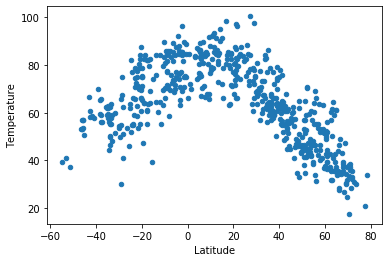

In [14]:
LatvsTemp_df = citiesTurned_df[["Temperature", "Latitude"]]
LatvsTemp_df.head()
LatvsTemp_df.plot(x = 'Latitude', y='Temperature', kind = 'scatter')
plt.show()

In [ ]:
# this code is plotting latitude against temperatures in 567 cities around the globe. From the data shown, it seems pretty clear
# that the closer a city is to the equator, the hotter the temperature is.

## Latitude vs. Humidity Plot

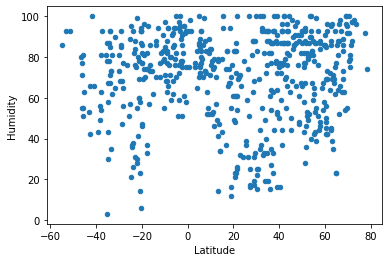

In [15]:
LatvsHum_df = citiesTurned_df[["Humidity", "Latitude"]]
LatvsHum_df.head()
LatvsHum_df.plot(x = 'Latitude', y='Humidity', kind = 'scatter')
plt.show()

In [ ]:
# this code is plotting latitude against the percent humidity in 567 cities around the globe. From the data shown, there doesn't
# seem to be a correlation between latitude and humidity.There are cities with a range of humidity levels in every latitude.

## Latitude vs. Cloudiness Plot

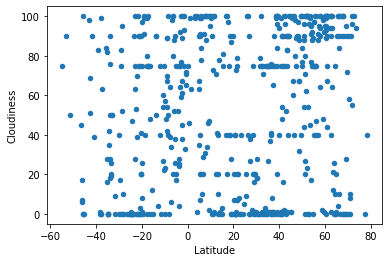

In [16]:
LatvsCloud_df = citiesTurned_df[["Cloudiness", "Latitude"]]
LatvsCloud_df.head()
LatvsCloud_df.plot(x = 'Latitude', y='Cloudiness', kind = 'scatter')
plt.show()

In [ ]:
# this code is plotting latitude against cloudiness in 567 cities around the globe. From the data shown, there doesn't
# seem to be a correlation between latitude and cloudiness.There are both cloudy and clear cities in every latitude.

## Latitude vs. Wind Speed Plot

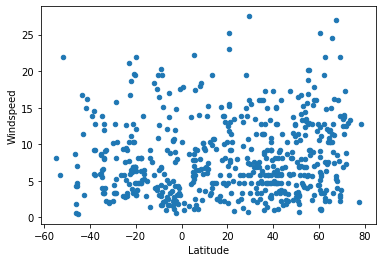

In [17]:
LatvsWS_df = citiesTurned_df[["Windspeed", "Latitude"]]
LatvsWS_df.head()
LatvsWS_df.plot(x = 'Latitude', y='Windspeed', kind = 'scatter')
plt.show()

In [ ]:
# this code is plotting latitude against windspeed in 567 cities around the globe. From the data shown, there doesn't
# seem to be a correlation between latitude and windspeed.There are cities with a range of windspeeds in every latitude.

## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots

In [19]:
# Create Northern Hemisphere DataFrame
northernCities_df = citiesTurned_df[citiesTurned_df['Latitude']>0]
northernCities_df.head()

,Temperature,Max Temp,Latitude,Longitude,Humidity,Cloudiness,Windspeed
yellowknife,31.73,32.00,62.46,-114.35,86.0,90.0,12.75
kayes,95.00,95.00,14.00,-11.00,34.0,0.0,4.70
yar-sale,34.50,34.50,66.83,70.83,93.0,100.0,16.22
banda aceh,86.18,86.18,5.56,95.32,72.0,91.0,5.19
georgetown,86.41,87.80,5.41,100.34,84.0,20.0,1.12


In [20]:
# Create Southern Hemisphere DataFrame
southernCities_df = citiesTurned_df[citiesTurned_df['Latitude']<0]
southernCities_df.head()

,Temperature,Max Temp,Latitude,Longitude,Humidity,Cloudiness,Windspeed
bengkulu,87.91,87.91,-3.80,102.27,59.0,28.0,5.01
tres arroyos,65.32,65.32,-38.37,-60.28,56.0,1.0,14.54
hermanus,56.30,56.30,-34.42,19.23,78.0,42.0,6.58
new norfolk,58.30,61.00,-42.78,147.06,66.0,69.0,3.00
bredasdorp,44.60,44.60,-34.53,20.04,87.0,35.0,3.36


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

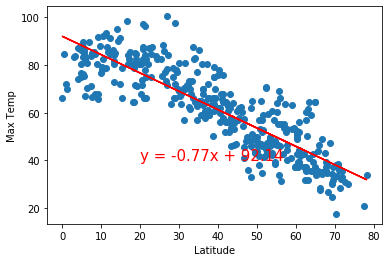

In [35]:
LatvsMaxNorth_df = northernCities_df[["Max Temp", "Latitude"]]
LatvsMaxNorth_df.head()
x_values = LatvsMaxNorth_df['Latitude']
y_values = LatvsMaxNorth_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

In [ ]:
# this code is plotting latitude against the maximum temperature in cities in the northern hemisphere. There does
# seem to be a fairly strong correlation between latitude and the maximum temperature. The further cities are from the equator,
# the colder they are.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

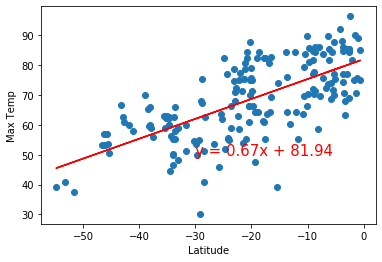

In [36]:
LatvsMaxSouth_df = southernCities_df[["Max Temp", "Latitude"]]
LatvsMaxSouth_df.head()
x_values = LatvsMaxSouth_df['Latitude']
y_values = LatvsMaxSouth_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

In [ ]:
# this code is plotting latitude against the maximum temperature in cities in the southern hemisphere. There does
# seem to be a fairly strong correlation between latitude and the maximum temperature. As we saw with the northern hemisphere, 
# the further cities are from the equator,the colder they are.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

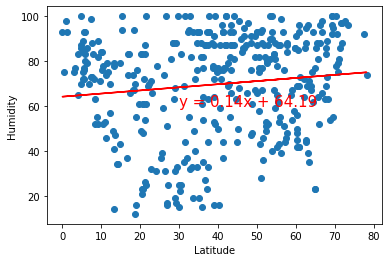

In [38]:
LatvsHumNo_df = northernCities_df[["Humidity", "Latitude"]]
LatvsHumNo_df.head()
x_values = LatvsHumNo_df['Latitude']
y_values = LatvsHumNo_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

In [ ]:
# this code is plotting latitude against the humidity in cities in the northern hemisphere. There does not
# seem to be a correlation between latitude and the humidity. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

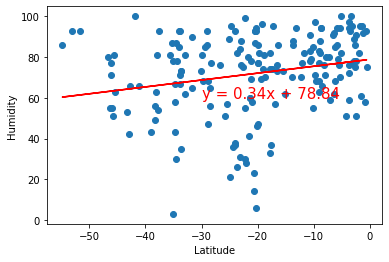

In [40]:
LatvsHumSo_df = southernCities_df[["Humidity", "Latitude"]]
LatvsHumSo_df.head()
x_values = LatvsHumSo_df['Latitude']
y_values = LatvsHumSo_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

In [ ]:
# this code is plotting latitude against the humidity in cities in the southern hemisphere. There does not
# seem to be a correlation between latitude and the humidity. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

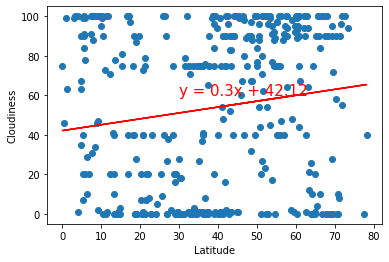

In [41]:
LatvsCloudNo_df = northernCities_df[["Cloudiness", "Latitude"]]
LatvsCloudNo_df.head()
x_values = LatvsCloudNo_df['Latitude']
y_values = LatvsCloudNo_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

In [ ]:
# this code is plotting latitude against the cloudiness in cities in the northern hemisphere. There does not
# seem to be a correlation between latitude and the cloudiness. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

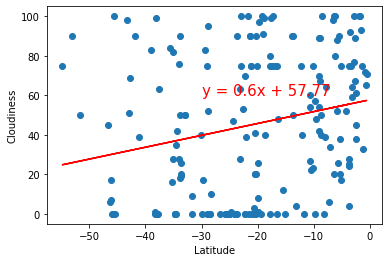

In [42]:
LatvsCloudSo_df = southernCities_df[["Cloudiness", "Latitude"]]
LatvsCloudSo_df.head()
x_values = LatvsCloudSo_df['Latitude']
y_values = LatvsCloudSo_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

In [ ]:
# this code is plotting latitude against the cloudiness in cities in the sourthern hemisphere. There does not
# seem to be a correlation between latitude and the cloudiness. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

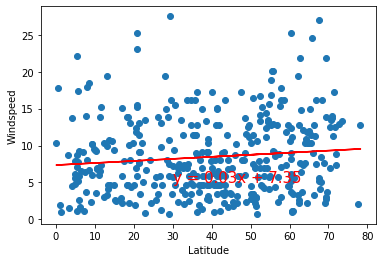

In [46]:
LatvsWSN_df = northernCities_df[["Windspeed", "Latitude"]]
LatvsWSN_df.head()
x_values = LatvsWSN_df['Latitude']
y_values = LatvsWSN_df['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.show()

In [ ]:
# this code is plotting latitude against the windspeed in cities in the northern hemisphere. There does not
# seem to be a correlation between latitude and the windspeed. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

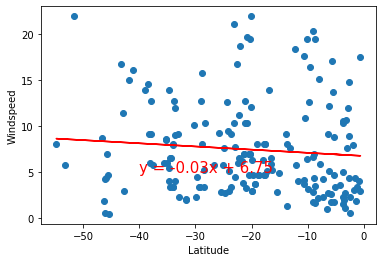

In [47]:
LatvsWSS_df = southernCities_df[["Windspeed", "Latitude"]]
LatvsWSS_df.head()
x_values = LatvsWSS_df['Latitude']
y_values = LatvsWSS_df['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.show()

In [ ]:
# this code is plotting latitude against the windspeed in cities in the southern hemisphere. There does not
# seem to be a correlation between latitude and the windspeed. 